<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

<h3>You are a consulting firm tasked to examine the hiring practice of a division of a public company.
You are given the HR records of all past and present employees.  A complaint has been filed that this division
discriminates against women and low wage workers.  Examine the data and come up with a conclusion.

<h3>The output should be in a Jupyter notebook with the following name: Lastname_Firstname_DATASCIENCE_CAPSTONE_202108.<br>
Each answer should have a clear label of what you are answering using markdown</h3>

In [1]:
# Needed Libraries
import pandas as pd

<h2>Part 1-a</h2>
1 - Import the Gender, Salarly Grade and Deptartment columns from <em>emp_file_CAPSTONE.txt</em>.

In [2]:
# Importing the CSV
gender_grades = pd.read_csv('emp_file_CAPSTONE.txt', usecols=['gender', 'sg', 'dept'])
# Renaming the columns to a readable format
gender_grades.rename({'gender': 'Gender', 'sg': 'Grade', 'dept': 'Dept'}, axis=1, inplace=True)
print(gender_grades.head())

  Gender  Grade  Dept
0      F      1    hr
1      M      1  comp
2      M      4   fin
3      M      7  comp
4      M      7  proj


2 - Capitalize the values of the Department column.

In [3]:
# Capitalizing all the values in the department column
gender_grades['Dept'] = gender_grades['Dept'].str.upper()

3 - Create a dataframe using Salary Grades as indices with Male and Female columns.

In [4]:
# Create a filter for each gender
male = gender_grades['Gender'] == 'M'
female = gender_grades['Gender'] == 'F'

# Get a list of salary grades
salary_grades = sorted(gender_grades['Grade'].unique())

# Get lists with the counts of males and females in each salary grade
males_by_grade = [gender_grades['Gender'][(gender_grades['Grade'] == g) & male].size for g in salary_grades]
females_by_grade = [gender_grades['Gender'][(gender_grades['Grade'] == g) & female].size for g in salary_grades]

# Create the dataframe using a dictionary of 'Male' and 'Female' columns
grades_by_gender = pd.DataFrame({
    'Males': males_by_grade,
    'Females': females_by_grade
    },
    index=salary_grades)

print(grades_by_gender)


   Males  Females
1     65       22
2     68       26
3     70       32
4     81       22
5     54       34
6     58       34
7     81       31


4 - Create pie charts for every Salary Grade with the ratio of men to women.

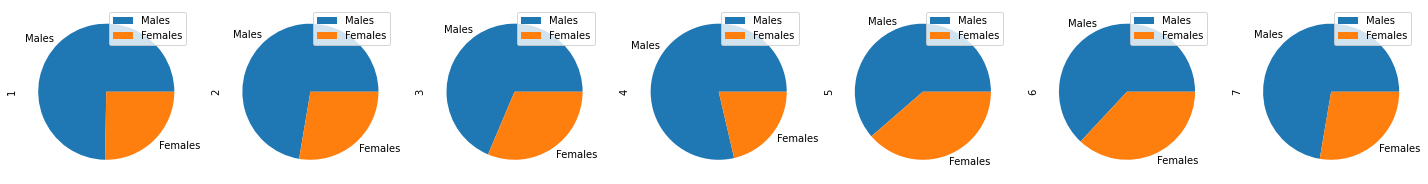

In [5]:
grade_ratios = grades_by_gender.T.plot.pie(subplots=True, figsize=(25, 10))

5 - Create a dataframe using Departments as indices with Male and Female columns.

In [6]:
# Get a list of departments
departments = gender_grades['Dept'].unique()

# Get lists with the counts of males and females in each department
males_by_dept = [gender_grades['Gender'][(gender_grades['Dept'] == d) & male].size for d in departments]
females_by_dept = [gender_grades['Gender'][(gender_grades['Dept'] == d) & female].size for d in departments]

# Create the dataframe using a dictionary of 'Male' and 'Female' columns
depts_by_gender = pd.DataFrame({
    'Males': males_by_dept,
    'Females': females_by_dept
    },
    index=departments)

print(depts_by_gender)

      Males  Females
HR       67       29
COMP     73       31
FIN      67       31
PROJ     65       21
ACC      60       28
I.T.     84       29
PUB      61       32


6 - Create pie charts for every Department with the ratio of men to women.

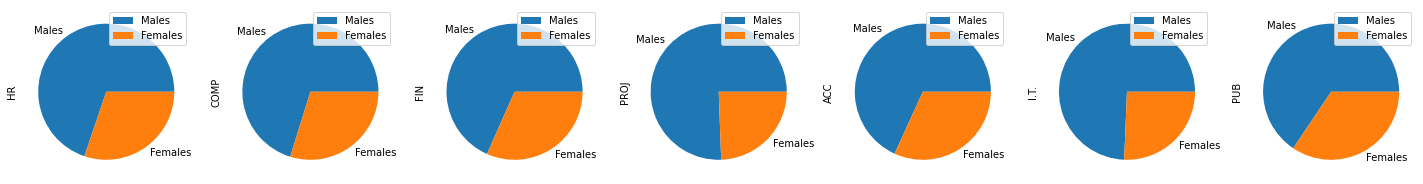

In [7]:
dept_ratios = depts_by_gender.T.plot.pie(subplots=True, figsize=(25, 10))

<h2>Part 1-b</h2>
1 - Import all columns from <em>emp_file_CAPSTONE.txt</em>.

In [8]:
# Importing the CSV
employee_file = pd.read_csv('emp_file_CAPSTONE.txt', parse_dates=[7, 8])
# Renaming the columns to a readable format
employee_file.rename({
    'fn': 'First',
    'ln': 'Last',
    'mi': 'MI',
    'gender':'Gender',
    'sg': 'Grade',
    'salary': 'Salary',
    'dept': 'Dept Code',
    'hiredate': 'Hired',
    'termdate': 'Terminated'
    },
    axis=1, inplace=True)
print(employee_file.head())

     First      Last   MI Gender  Grade    Salary Dept Code      Hired  \
0  Madison    WILTON    W      F      1    $77582        hr 2015-11-22   
1    James     SMITH    A      M      1     38136      comp 2018-01-17   
2     John   JOHNSON  NaN      M      4    107483       fin 2017-06-02   
3   Robert  WILLIAMS    W      M      7  3X429110      comp 2013-11-25   
4  Michael     BROWN    J      M      7  3X646818      proj 2012-01-20   

  Terminated  
0             
1             
2             
3             
4             


2 - Format the last names to title case.

In [9]:
# Capitalizing all the values in the department column
employee_file['Dept Code'] = employee_file['Dept Code'].str.upper()
# Title case all the values in the last name column
employee_file['Last'] = employee_file['Last'].str.title()
print(employee_file.head())

     First      Last   MI Gender  Grade    Salary Dept Code      Hired  \
0  Madison    Wilton    W      F      1    $77582        HR 2015-11-22   
1    James     Smith    A      M      1     38136      COMP 2018-01-17   
2     John   Johnson  NaN      M      4    107483       FIN 2017-06-02   
3   Robert  Williams    W      M      7  3X429110      COMP 2013-11-25   
4  Michael     Brown    J      M      7  3X646818      PROJ 2012-01-20   

  Terminated  
0             
1             
2             
3             
4             


3 - Create a column called Name which has <em>Last Name, First Name MI</em>.

In [10]:
# Concatenating the last name, first name, and middle initial columns
employee_file['Name'] = employee_file['Last'].str.cat(employee_file['First'], ', ').str.cat(employee_file['MI'], ' ', '')
print(employee_file.head())

     First      Last   MI Gender  Grade    Salary Dept Code      Hired  \
0  Madison    Wilton    W      F      1    $77582        HR 2015-11-22   
1    James     Smith    A      M      1     38136      COMP 2018-01-17   
2     John   Johnson  NaN      M      4    107483       FIN 2017-06-02   
3   Robert  Williams    W      M      7  3X429110      COMP 2013-11-25   
4  Michael     Brown    J      M      7  3X646818      PROJ 2012-01-20   

  Terminated                Name  
0              Wilton, Madison W  
1                 Smith, James A  
2                 Johnson, John   
3             Williams, Robert W  
4               Brown, Michael J  


4 - Create an alphabetic list of employees by Last Name, First Name using the Name column.

In [11]:
# Create a new series with sorted names
names_alphabetic = employee_file['Name'].sort_values()
print(names_alphabetic.head())

645     Abbott, Raymond 
665     Acevedo, Keith A
302    Acosta, Patricia 
42      Adams, Benjamin 
449      Adkins, Dennis 
Name: Name, dtype: object


5 - Create a alphabetic list of employees by Last Name, First Name for each Department using the Name column.

In [12]:
# Create a series with the departments as indices and lists of employees in alphabetical order
names_by_dept = pd.Series({d: sorted(employee_file['Name'][employee_file['Dept Code'] == d]) for d in departments})
print(names_by_dept)

HR      [Acevedo, Keith A, Acosta, Patricia , Andrade,...
COMP    [Adams, Benjamin , Ali, Zachary , Atkins, Haro...
FIN     [Aguilar, Shirley J, Anderson, Donald , Armstr...
PROJ    [Aguirre, James , Allison, Patrick G, Alvarado...
ACC     [Andrews, Steven F, Anthony, Steven F, Arnold,...
I.T.    [Adkins, Dennis , Allen, Nicholas , Alvarez, L...
PUB     [Abbott, Raymond , Alexander, Kimberly F, Ball...
dtype: object


6 - Create a horizontal bar chart with the number of employees per Department.

Text(0, 0.5, 'Departments')

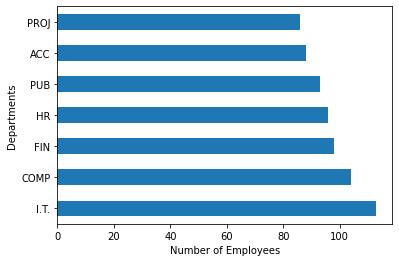

In [13]:
# Get counts by department
employees_by_dept = employee_file['Dept Code'].value_counts()
employees_bar = employees_by_dept.plot.barh()
employees_bar.set_xlabel('Number of Employees')
employees_bar.set_ylabel('Departments')


<h2>Part 2 - a</h2>
1 - Remove the NaN values from the MI column.

In [14]:
# Replace NaN values in the middle initial column with an empty string
employee_file['MI'].fillna('', inplace=True)
print(employee_file.head())

     First      Last MI Gender  Grade    Salary Dept Code      Hired  \
0  Madison    Wilton  W      F      1    $77582        HR 2015-11-22   
1    James     Smith  A      M      1     38136      COMP 2018-01-17   
2     John   Johnson         M      4    107483       FIN 2017-06-02   
3   Robert  Williams  W      M      7  3X429110      COMP 2013-11-25   
4  Michael     Brown  J      M      7  3X646818      PROJ 2012-01-20   

  Terminated                Name  
0              Wilton, Madison W  
1                 Smith, James A  
2                 Johnson, John   
3             Williams, Robert W  
4               Brown, Michael J  


2 - Import <em>dept_CAPSTONE.txt</em>.

In [15]:
# Import the file and remove the qoutes
dept_codes = pd.read_csv('dept_CAPSTONE.txt', quotechar="'")
# Rename the columns for readability
dept_codes.rename({'deptCode': 'Dept Code', 'dept name': 'Dept Name'}, axis=1, inplace=True)
print(dept_codes)

  Dept Code                Dept Name
0       fin                  Finance
1       acc              Acco0unting
2       pub         Public Relations
3        hr        Human resou0rses$
4      comp    Lega@l and Compliance
5      proj       Project Management
6      I.T.  Informa1tion Technology


3 - Capitalize the values of the Dept Code column.

In [16]:
# Capitalize the values in the Dept Code column
dept_codes['Dept Code'] = dept_codes['Dept Code'].str.upper()
print(dept_codes)

  Dept Code                Dept Name
0       FIN                  Finance
1       ACC              Acco0unting
2       PUB         Public Relations
3        HR        Human resou0rses$
4      COMP    Lega@l and Compliance
5      PROJ       Project Management
6      I.T.  Informa1tion Technology


4 - Remove the non alpha characters from the department names.

In [17]:
# Remove non alpha characters from the department names
dept_codes['Dept Name'] = dept_codes['Dept Name'].str.replace(r'[^a-zA-Z ]', '', regex=True)
print(dept_codes)

  Dept Code               Dept Name
0       FIN                 Finance
1       ACC              Accounting
2       PUB        Public Relations
3        HR         Human resourses
4      COMP    Legal and Compliance
5      PROJ      Project Management
6      I.T.  Information Technology


5 - Title case the department names.

In [18]:
# Title case all the department names
dept_codes['Dept Name'] = dept_codes['Dept Name'].str.title()
print(dept_codes)

  Dept Code               Dept Name
0       FIN                 Finance
1       ACC              Accounting
2       PUB        Public Relations
3        HR         Human Resourses
4      COMP    Legal And Compliance
5      PROJ      Project Management
6      I.T.  Information Technology


6 - Join the employee data frame and the department data frame on the department code column.

In [19]:
# Join the two data frames on the department code column
employee_file = employee_file.join(dept_codes.set_index('Dept Code'), on='Dept Code')
print(employee_file.head())

     First      Last MI Gender  Grade    Salary Dept Code      Hired  \
0  Madison    Wilton  W      F      1    $77582        HR 2015-11-22   
1    James     Smith  A      M      1     38136      COMP 2018-01-17   
2     John   Johnson         M      4    107483       FIN 2017-06-02   
3   Robert  Williams  W      M      7  3X429110      COMP 2013-11-25   
4  Michael     Brown  J      M      7  3X646818      PROJ 2012-01-20   

  Terminated                Name             Dept Name  
0              Wilton, Madison W       Human Resourses  
1                 Smith, James A  Legal And Compliance  
2                 Johnson, John                Finance  
3             Williams, Robert W  Legal And Compliance  
4               Brown, Michael J    Project Management  


7 - Create a file called <em>ACTIVE_EMPLOYEES_BY_DEPT</em>. Print all active employees by department and hire date in descending order.

In [20]:
# Get a data frame with only the active employees sorted by department and hire date
active_employees = employee_file[employee_file['Terminated'] == ' '].sort_values(['Dept Name', 'Hired'])
# Write the employee names, department, and hire date to CSV
active_employees[['Name', 'Dept Name', 'Hired']].to_csv('ACTIVE_EMPLOYEES_BY_DEPT.csv')
print(active_employees[['Name', 'Dept Name', 'Hired']])

                   Name         Dept Name      Hired
179    Salazar, Janice         Accounting 2003-11-08
666    Benitez, Roger F        Accounting 2003-11-29
510    Suarez, Charles         Accounting 2004-04-11
395  Baldwin, Natalie G        Accounting 2004-12-05
656      Barron, Adam G        Accounting 2005-04-29
..                  ...               ...        ...
268     Gilbert, Ethan   Public Relations 2018-07-16
251   Franklin, Tyler J  Public Relations 2018-08-03
550    Barrera, Jerry P  Public Relations 2018-09-19
30     Robinson, Ryan A  Public Relations 2018-10-12
431     Rosales, Jacob   Public Relations 2018-10-13

[617 rows x 3 columns]


8 - Create a histogram that shows the number of employees by years employed per department.

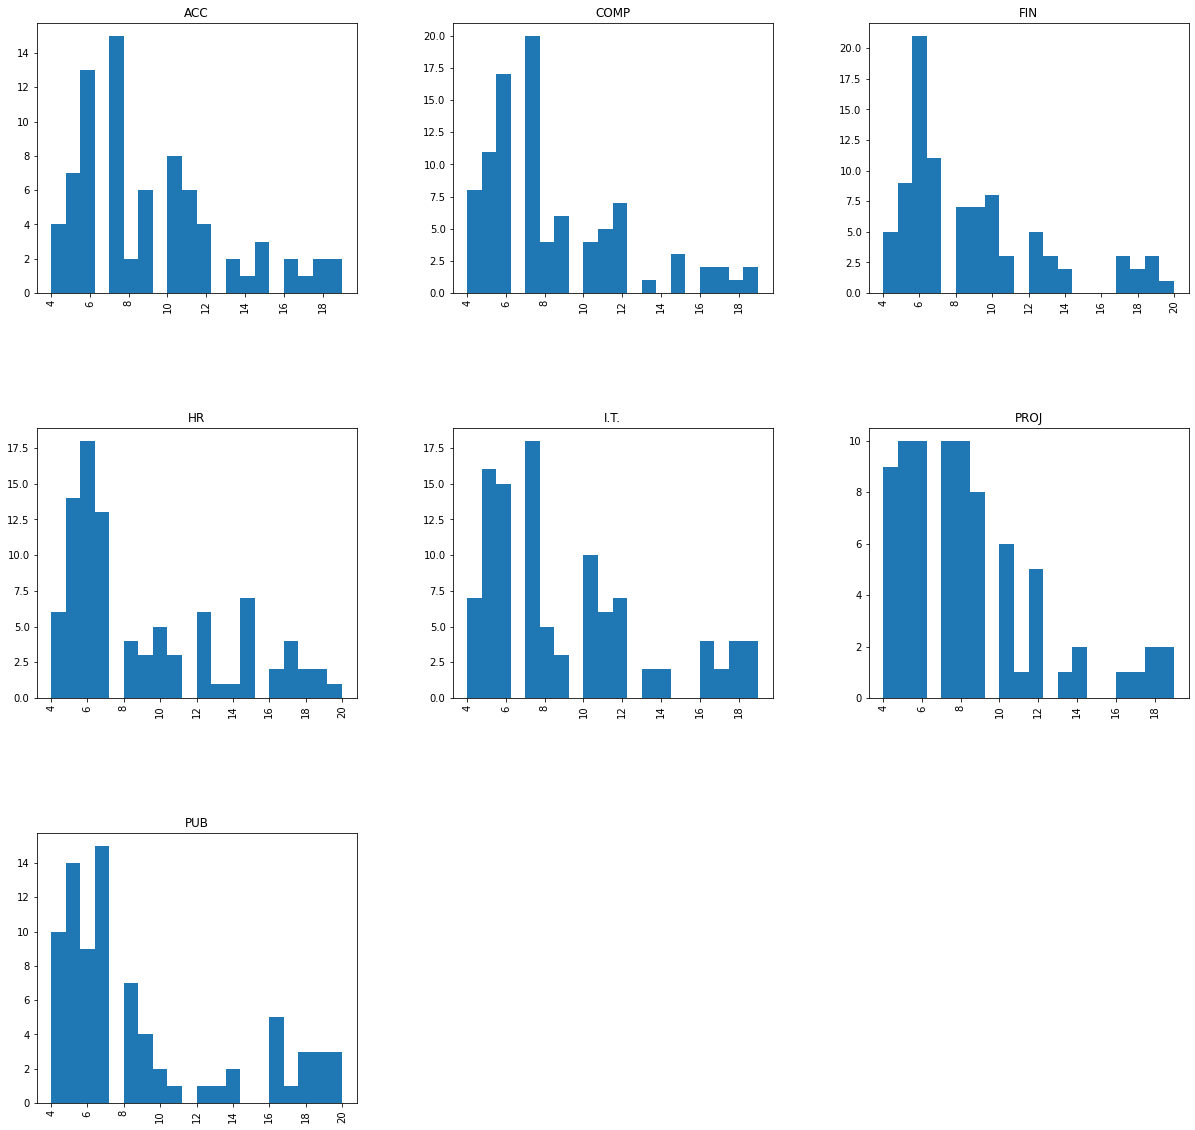

In [21]:
# Get a list of years employees were hired
years = sorted(active_employees['Hired'].dt.year.unique())

# Create a column for years employed
active_employees['Years Employed'] = [int(2022 - d.year) for d in active_employees['Hired']]

# Plot the frequency of years employed by department
active_hist = active_employees.hist('Years Employed', by='Dept Code', bins=20, figsize=(20, 20))


<h2>Part 2 - b - SALARY ANALYSIS</h2>
NOTE: A normal distribution has the following attributes:<br>
68% within 1 standard deviation, 95% within 2 STD, 99% within 3 STD<br>
1 - Decode the salaries column and remove non alpha characters.

In [22]:
# Create a key to decode the salaries
decoder = [str(i) for i in range(10)]
# Remove non alpha characters, convert to integers, and decode the salaries that require it
employee_file['Salary'] = employee_file['Salary'].str.replace(r'\W', '', regex=True).apply(lambda x: int(x) if x[:2] != '3X' else int(''.join([decoder[(decoder.index(d) - 3)] for d in x[2:]])))

print(employee_file['Salary'])

0       77582
1       38136
2      107483
3      196887
4      313585
        ...  
673    166220
674    114045
675     33030
676     51120
677     44124
Name: Salary, Length: 678, dtype: int64


2 - Create a histogram of all salaries in deciles.

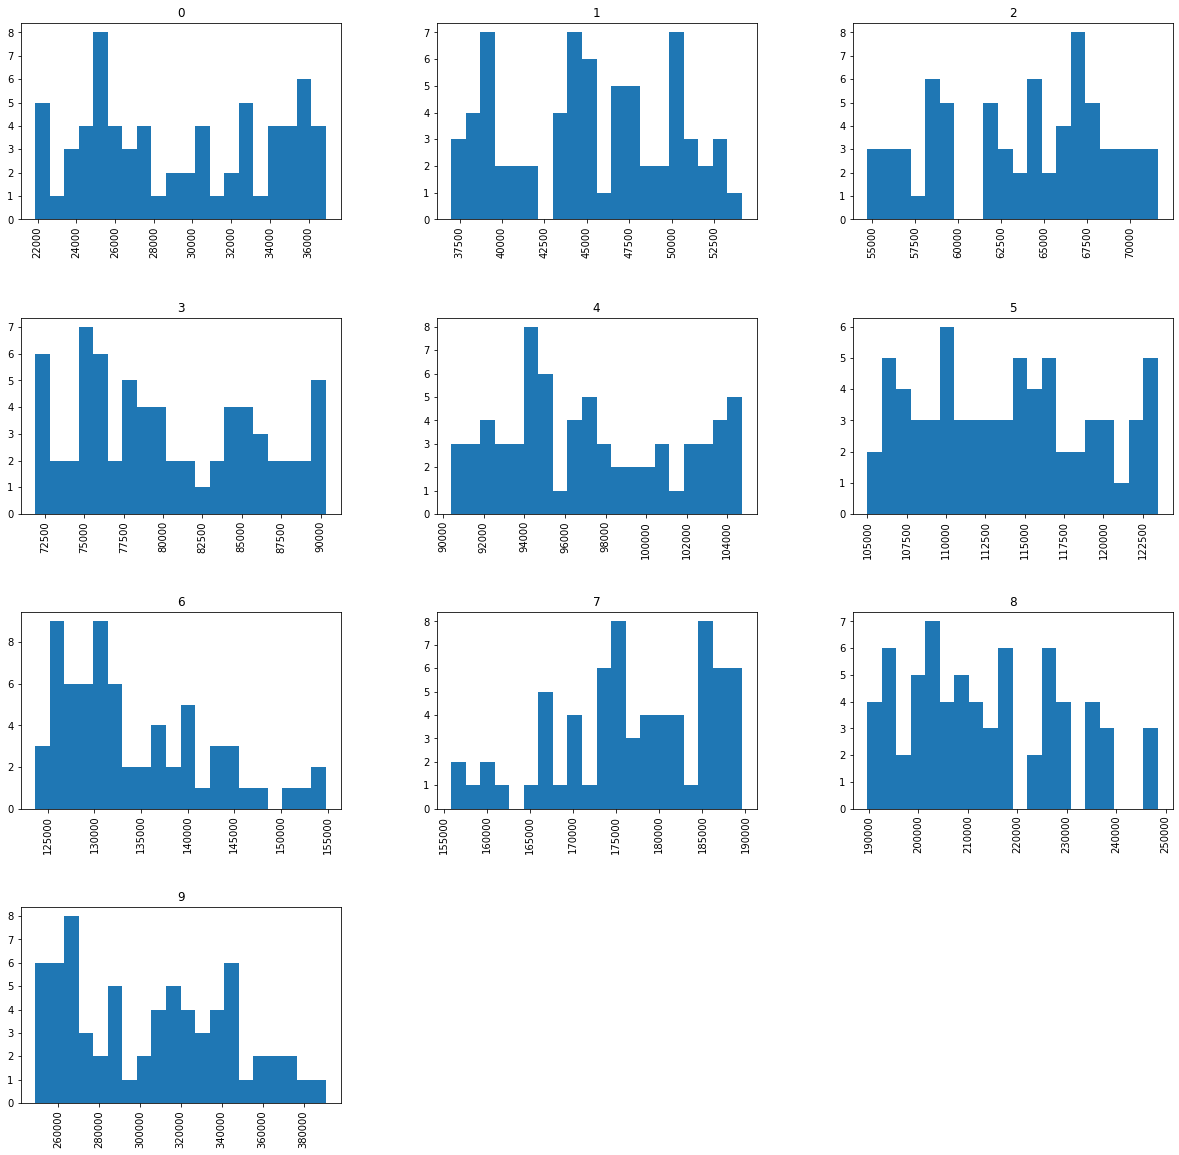

In [23]:
# Get the decile ranks
deciles = pd.DataFrame({'Salary': employee_file['Salary'], 'Rank': pd.qcut(employee_file['Salary'], 10, labels=False)})
# Plot it
deciles_hist = deciles.hist('Salary', by='Rank', bins=20, figsize=(20, 20))

3 - Calculate the mean, mode, median, and standard deviation of the salaries.

In [24]:
salaries = employee_file['Salary']
salary_mean = round(salaries.mean(), 2)
salary_median = salaries.median()
salary_mode = salaries.mode()
salary_std = round(salaries.std(), 2)
print(f'Mean: {salary_mean}\nMedian: {salary_median}\nMode: None\nStd Dev: {salary_std}')

Mean: 126009.4
Median: 104849.5
Mode: None
Std Dev: 82229.68


4 - Is the salary distribution a normal distribution?

5 - Calculate the mean, median, mode, and standard deviation of the male salaries.

In [32]:
male_salaries = employee_file['Salary'][male]
male_salary_stats = {
    'Mean': round(male_salaries.mean(), 2),
    'Median': male_salaries.median(),
    'Mode': male_salaries.mode(),
    'Std Dev': round(male_salaries.std(), 2)
}

print(f"Male Mean: {male_salary_stats['Mean']}\nMale Median: {male_salary_stats['Median']}\nMale Mode: None\nMale Std Dev: {male_salary_stats['Std Dev']}")

Male Mean: 127455.27
Male Median: 104722.0
Male Mode: None
Male Std Dev: 84843.89


6 - Calculate the mean, median, mode, and standard deviation of the female salaries.

In [33]:
female_salaries = employee_file['Salary'][female]
female_salary_stats = {
    'Mean': round(female_salaries.mean(), 2),
    'Median': female_salaries.median(),
    'Mode': female_salaries.mode(),
    'Std Dev': round(female_salaries.std(), 2),
}

print(f"Female Mean: {female_salary_stats['Mean']}\nFemale Median: {female_salary_stats['Median']}\nFemale Mode: None\nFemale Std Dev: {female_salary_stats['Std Dev']}")

Female Mean: 122578.15
Female Median: 106025.0
Female Mode: None
Female Std Dev: 75757.54


7 - Is the standard deviation, mean, mode, median higher for men? Calulate the % difference

8 - Write up- Do you think there is salary bias?

<h2>Part 2 - c</h2>
The salary grades of 5 - 7 are considered executive salary grades - Exempt or EXECUTIVE<br>
1 - create a new column called 'Status' Label each employee record in alpha order by name as EXEMPT or NON-EXEMPT

2 - Calculate the mean, mode, median, and standard deviation of the salaries of each salary grade

3 - Calculate the mean, mode, median, and standard deviation of the salaries of EXEMPT employees

4 - Calculate the mean, mode, median, and standard deviation of the salaries of NON-EXEMPT employees

5 - Create pie charts of the employee status of EXEMPT count by gender and NON-EXEMPT count by gender

6 - Create scatter plots of salary grade by mean salary

7 - Create a scatter plots of salary grade by mean salary for men

8 - Create a scatter plots of salary grade by mean salary for women

9 - Create a horizontal bar chart of EXEMPT employees by mean salary for men and women (1 chart)

10- Create a horizontal bar chart of NON-EXEMPT employees by mean salary for men and women (1 chart)

11 - Sort and output every Employee all columns by salary grade by name for every salary grade

<h2>Part 3a - Create employee Id</h2>
To construct the employee id for everyone use the following formula<br>
First 3 letters of the last name + first 3 letters of the last name + a random 3 digit number from (1 - 99)<br>
For example the employee name is Kevin Smith id = 'SMIKEV07'<br>
In the case of people with the same last name and first name generate a new number<br>
No duplication<br>


1 - List all employees in employee id order

<h2>Part 3b -Raises</h2>
1 - Import the file raises_CAPSTONE.txt<br>

2 - The rules for giving a raise are in the file but be careful of the order that your run the raise

3 - Based on each employees salary calculate 2 fields 'Raise_Amount' and 'New_Salary'

4 - Calculate the total salary for each dept

5 - Chart the total salary for each dept in 1 bar chart

6 - Create a pie chart that shows the percentage that each dept has of the total money allocated for raises

7 - Create a pie chart to show the percent of men vs women for the raise money allocated

8 - Create a pie chart to show the percent of men vs women for the raise money allocated by dept

9 - Create a dataframe for promotions.  If the persons salary excedes the salary max for their salary grade. create a column<br>
called 'Promotion' and add the string 'PROMOTION DUE' otherwise leave blank

<h2>Part 4 - Analysis</h2>
1 - Write about any conclusions you drew from the data.

2 - Are there any additional charts or analysis you could include to bolster your conclusions

This notebook is part of a course at www.codeimmersives.com called Data Science. If you accessed this notebook outside the course, you can get more information about this course online by clicking here.

<hr>

Copyright &copy; 2021  Code Immersives